<img src="task_for_time.png"></img>

<div align="center">
    <h1>Task for Time</h1>
</div>
<br/>
<div align="center"><i>
    This Jupyter notebook is a product of my performance during one of the job applications (which ended with a job offer). 
    <br/>The task was to get acquainted with the data and build a multiclass classification model <u>as fast as possible</u>.
    <br/>Everything starting from "Modules Import" has been created in <u>3 hours</u>.
    </i>
</div>

<div align="center"><i>
    <br/>During data exploration and modeling following important hypothesis were generated: 
    <br/>(1) the provided data is not real and was created artificially and (2) noise has been added to the test features or target.
    <br/><b>The 2nd hypothesis could explain so bad</b> (in comparison to the train data) <b>models' performance on the test data</b>.
    <br/><b>Both hypotheses were confirmed by the task's author</b>.
    <br/>
    <br/>by Artem Drofa
    </i>
</div>

## Modules Import

In [1]:
import pandas as pd
import numpy as np

from IPython.core.display import display as print_df
pd.options.display.max_columns = None



from matplotlib import pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer

# models
from sklearn.multiclass import OneVsRestClassifier
# ---
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

# Warnings
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
train = pd.read_csv('train.csv', header=None)
print('TRAIN | Shape:', train.shape, '| NaNs:', train.isnull().values.sum())
print_df(train.head(3))

test = pd.read_csv('test.csv', header=None)
print('TEST | Shape:', test.shape, '| NaNs:', test.isnull().values.sum())
print_df(test.head(3))

TRAIN | Shape: (8678, 66) | NaNs: 0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,-47,0,-5,-27,-11,-19,-2,-33,37,0,-4,-4,5,12,-28,16,-19,-5,-3,-10,-12,5,41,0,12,-9,-2,16,-11,-36,14,-10,9,7,2,-4,29,60,19,11,-14,-7,-2,5,-14,-27,-59,-13,-6,1,-3,-1,-10,3,20,-23,0,2,-4,-3,4,-23,-68,15,C,0
1,1,1,-2,-3,-1,-3,39,10,0,-1,2,5,0,2,2,-12,6,1,1,0,-2,9,-27,2,-10,2,0,2,19,-2,-78,-7,-17,-5,-3,-6,-27,-35,-32,-21,23,5,3,-1,13,18,69,-1,9,4,0,1,7,2,54,17,-7,-2,1,6,-2,4,22,2,C,0
2,1,-4,-2,-6,-20,20,-1,-3,20,3,-2,-4,26,-2,2,-9,1,2,4,8,-33,-32,-2,-1,-14,-5,-4,-1,-8,12,1,-1,-15,0,-1,-3,12,-6,-1,-12,27,5,5,3,-53,-54,-1,4,-13,-6,-6,-9,46,46,-6,-7,14,2,-2,0,23,21,-3,22,A,1


TEST | Shape: (3000, 66) | NaNs: 12


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,-47,0,-5,-27,-11.0,-19.0,-2.0,-33.0,37,0,-4,-4,5,12,-28.0,16,-19,-5.0,-3.0,-10.0,-12,5,41.0,0,12,-9,-2,16,-11,-36,14,-10,9,7,2,-4,29,60,19,11,-14,-7,-2,5,-14,-27,-59,-13,-6,1,-3,-1,-10,3,20,-23,0,2,-4,-3,4,-23,-68,15,A,0
1,1,1,-2,-3,-1.0,-3.0,39.0,10.0,0,-1,2,5,0,2,2.0,-12,6,1.0,1.0,0.0,-2,9,-27.0,2,-10,2,0,2,19,-2,-78,-7,-17,-5,-3,-6,-27,-35,-32,-21,23,5,3,-1,13,18,69,-1,9,4,0,1,7,2,54,17,-7,-2,1,6,-2,4,22,2,C,0
2,1,-4,-2,-6,-20.0,20.0,-1.0,-3.0,20,3,-2,-4,26,-2,2.0,-9,1,2.0,4.0,8.0,-33,-32,-2.0,-1,-14,-5,-4,-1,-8,12,1,-1,-15,0,-1,-3,12,-6,-1,-12,27,5,5,3,-53,-54,-1,4,-13,-6,-6,-9,46,46,-6,-7,14,2,-2,0,23,21,-3,22,B,1


**Notes:**
* check NaNs in `test`;
* feature #64 seems to be categorical, check if other cat. features persist in dataset

### Splitting Data (X: train / test, y: train / test)

In [3]:
X_train, y_train = train.iloc[:, 0:65], train.iloc[:, 65]
X_test, y_test = test.iloc[:, 0:65], test.iloc[:, 65]

X = pd.concat([X_train, X_test], ignore_index=True)

## EDA

#### NaNs in Test

Let's investigate NaNs in `test` set.

In [4]:
test.isnull().sum()[test.isnull().sum() != 0]

4     1
5     1
6     1
7     1
14    2
17    3
18    1
19    1
22    1
dtype: int64

O.K., NaNs are distributed among different columns. Most likely I'd will fill them with:
* for linear model - mean values  (and, may be, additional binary feature for NaN/non-Nan should be added);
* for tree-based models - zeros / outliers.

#### Target Distribution

Let's imagine that we know nothing about `test`'s target and won't look at this at all (untill performace measurement stage).

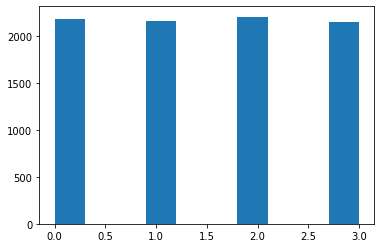

2    2202
0    2177
1    2152
3    2147
Name: 65, dtype: int64

In [5]:
plt.hist(y_train)
plt.show()

print_df(y_train.value_counts())

O.K., the target is rather balanced.

#### Features type

##### Categorical Featrues

We've identified 1 cat. feature, let's check if there are some more cat. features

In [6]:
print_df(X.nunique().sort_values().head(5))

64     4
18    53
2     55
34    55
42    57
dtype: int64

Other features has larger range of unique values, seems, they are not categorical.

Let's check if all of categories exist in both (train and test) datasets.

In [7]:
print('TRAIN:', X_train.iloc[:, 64].unique())
print('TEST:', X_test.iloc[:, 64].unique())

TRAIN: ['C' 'A' 'B' 'D']
TEST: ['A' 'C' 'B' 'D']


Yes, it's O.K.

We have rather large amount of observations in comparisson to amount of features, also there are only 4 categories, so, let's one-hot encode this categorical feature.

In [8]:
ohe = pd.get_dummies(X.iloc[:, 64])
X = pd.concat([X.iloc[:, 0:64], ohe], axis=1)

X_train = X.iloc[:len(X_train), :]
X_test = X.iloc[len(X_train):, :]

# check
assert(len(X_train) == len(y_train)); assert(len(X_test) == len(y_test))

##### Other Features
*most likely, continious / semi-continious (i.e. discrete)*

In [9]:
X.iloc[:, 0:64].describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
count,11678.000000,11678.000000,11678.000000,11678.000000,11677.000000,11677.000000,11677.000000,11677.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11676.000000,11678.000000,11678.000000,11675.000000,11677.000000,11677.000000,11678.000000,11678.000000,11677.000000,11678.000000,11678.00000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000
mean,-0.458726,-0.692499,-0.747645,-0.659616,-0.276698,-0.420399,-1.296395,-0.740516,-0.584518,-0.569532,-0.735143,-0.719387,0.279072,-0.069789,-1.248373,-0.738226,-0.704316,-0.729165,-0.771003,-0.714738,-0.062425,-0.194811,-1.009934,-0.637524,-0.65739,-0.643432,-0.667837,-0.627505,-0.173232,-0.260490,-1.288063,-0.713735,-0.981932,-0.814780,-0.821716,-0.738311,0.095907,-0.072444,-1.476708,-0.712879,-0.640007,-0.760233,-0.804590,-0.680339,-0.075784,-0.567220,-1.499229,-0.694211,-0.633328,-0.872324,-0.810498,-0.779243,-0.261089,-0.360421,-2.000514,-1.013872,-0.826083,-0.709539,-0.788577,-0.687446,-0.281641,-0.688132,-1.253811,-0.544699
std,18.794093,11.822496,4.958605,7.372727,17.914458,25.771968,25.008801,15.377319,18.284779,11.716408,5.039467,7.464520,17.957086,26.123963,25.509962,15.478917,18.462060,12.023532,5.026528,7.571328,18.037992,25.640581,25.001351,14.931928,17.80174,11.827698,4.940136,7.303743,17.993249,26.181748,24.752122,15.694791,17.749793,11.882119,4.894037,7.353632,17.843723,26.423327,25.041285,15.373148,18.052663,12.189473,4.984244,7.402148,18.023017,26.077849,24.358512,15.154286,17.931396,11.943670,4.966391,7.461568,17.648085,25.828855,25.204363,14.893455,18.037223,11.893841,4.983341,7.342682,17.714179,25.404209,25.422806,15.335092
min,-116.000000,-104.000000,-33.000000,-75.000000,-121.000000,-122.000000,-128.000000,-128.000000,-110.000000,-128.000000,-36.000000,-84.000000,-102.000000,-128.000000,-128.000000,-128.000000,-119.000000,-103.000000,-38.000000,-99.000000,-103.000000,-120.000000,-128.000000,-104.000000,-108.00000,-115.000000,-27.000000,-95.000000,-99.000000,-128.000000,-128.000000,-127.000000,-104.000000,-112.000000,-56.000000,-85.000000,-95.000000,-119.000000,-128.000000,-113.000000,-121.000000,-120.000000,-39.000000,-79.000000,-102.000000,-116.000000,-128.000000,-128.000000,-128.000000,-120.000000,-54.000000,-86.000000,-115.000000,-128.000000,-128.000000,-128.000000,-107.000000,-124.000000,-46.000000,-74.000000,-97.000000,-128.000000,-128.000000,-124.000000
25%,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-15.000000,-6.000000,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-9.000000,-14.000000,-6.000000,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-14.000000,-5.000000,-8.000000,-9.00000,-4.000000,-3.000000,-4.000000,-10.000000,-15.000000,-6.000000,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-15.000000,-6.000000,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-15.000000,-6.000000,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-15.000000,-6.000000,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-14.000000,-6.000000,-8.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.

In [10]:
def plot_dist(X, cols):
    if cols:
        X = X.iloc[:, cols[0]:cols[1]]
        
    fig = plt.figure(figsize = (18, 8))
    ax = fig.gca()
    X.iloc[:, 0:16].hist(ax = ax)
    plt.show()

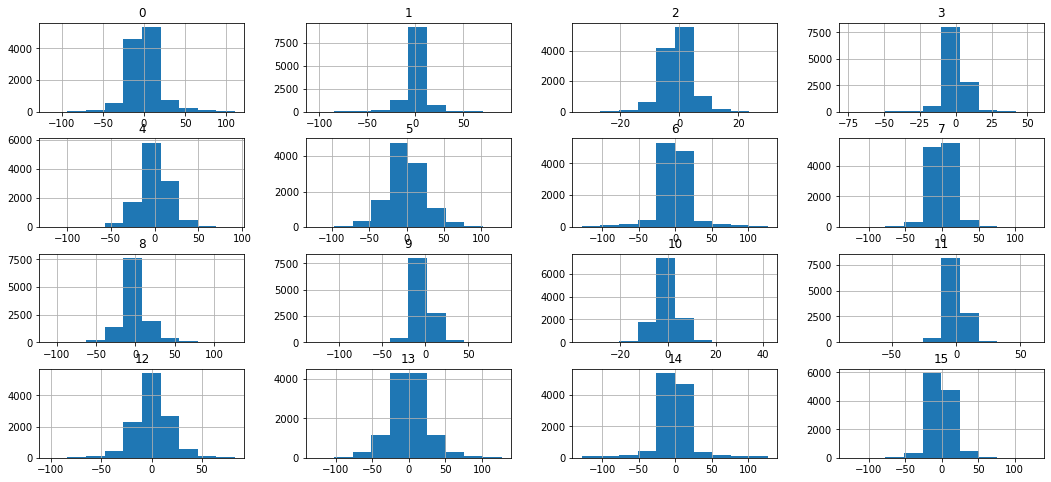

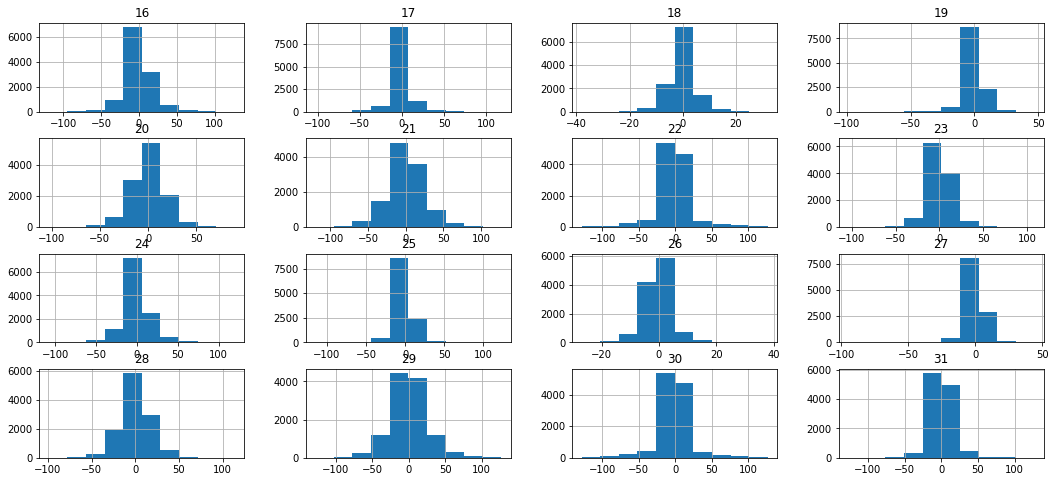

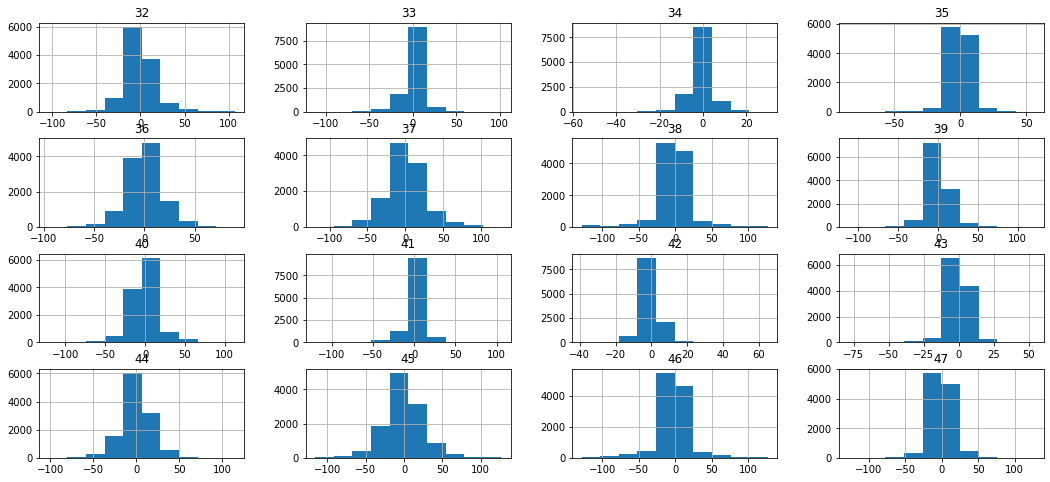

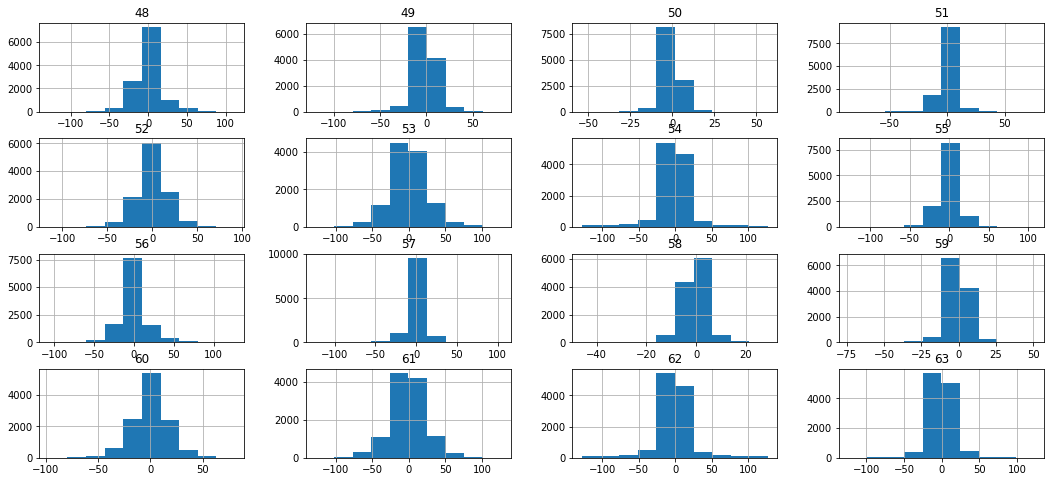

In [11]:
for i in range(4):
    start = 16 * i
    end = start + 16
    plot_dist(X, [start, end])

High-level visual analysis showed that all of the features have normal (or smth. around it) distribution. Some features are shifted in relation to 0, also their std is not 1, hence I believe it would be better (for linear models) to apply StandardScaler.

## Modelling

Inasmuch observations between classes are almost perfectly balanced, I think I'd proceed with One-Vs-One classifiers in real-world case, but to save the time for models' learning let's proceed with One-Vs-The-Rest approach.

I'll try to apply:
* Logistic Regression;
* Random Forest;
* Boosting (above trees).

As a loss function I'll use log-loss, I'll check models' quality on 5-folds cross-validation.

In [12]:
mlb = MultiLabelBinarizer()

y_train_multi = mlb.fit_transform(y_train.astype(str))
y_test_multi = mlb.transform(y_test.astype(str))

In [13]:
def cross_val_model(model, X, y, y_multi):
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

    losses = []

    for train_index, test_index in skf.split(X, y):
        
        multi_model = OneVsRestClassifier(model, n_jobs=-1)

        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y_multi[train_index], y_multi[test_index]

        multi_model.fit(X_train, y_train)
        y_pred = multi_model.predict_proba(X_test)
        loss = log_loss(y_test, y_pred)

        losses.append(loss)
    
    return losses

#### LogReg

In [14]:
logreg = SGDClassifier(loss='log',
                       penalty=None, 
                       max_iter=100, # convergence here or below
                       n_jobs=-1,
                       random_state=17)

logreg_loss = cross_val_model(logreg, X_train, y_train, y_train_multi)
logreg_loss_mean = np.array(logreg_loss).mean()

print('LogReg Loss:', logreg_loss_mean)
print('LogReg \'Average Accuracy\':', np.exp(-logreg_loss_mean))

LogReg Loss: 0.00236347964217979
LogReg 'Average Accuracy': 0.9976393111767156


#### Random Forest

In [15]:
rf = RandomForestClassifier(n_estimators=300,
                            n_jobs=-1,
                            random_state=17)

rf_loss = cross_val_model(rf, X_train, y_train, y_train_multi)
rf_loss_mean = np.array(rf_loss).mean()

print('RF Loss:', rf_loss_mean)
print('RF \'Average Accuracy\':', np.exp(-rf_loss_mean))

RF Loss: 0.027076398823953463
RF 'Average Accuracy': 0.973286880710778


#### Boosting *(above trees)*

In [16]:
boosting = GradientBoostingClassifier(learning_rate=0.01,
                                      n_estimators=300,
                                      random_state=17)

boosting_loss = cross_val_model(boosting, X_train, y_train, y_train_multi)
boosting_loss_mean = np.array(boosting_loss).mean()

print('Boosting Loss:', boosting_loss_mean)
print('Boosting \'Average Accuracy\':', np.exp(-boosting_loss_mean))

Boosting Loss: 0.03799276097429072
Boosting 'Average Accuracy': 0.9627199100201541


It is interesting that algorithms 'out-of-the-box' have shown very low loss / high accuracy. This is a sign to suppose that the data was generated artificially.

## Test Target Prediction

#### LogReg

In [17]:
multi_model_logreg = OneVsRestClassifier(logreg, n_jobs=-1)
multi_model_logreg.fit(X_train, y_train_multi)
y_pred_logreg = multi_model_logreg.predict_proba(X_test.fillna(X_test.mean()))


print('LogReg Loss (Test):', log_loss(y_test_multi, y_pred_logreg))
print('LogReg \'Average Accuracy\' (Test):', np.exp(-log_loss(y_test_multi, y_pred_logreg)))

LogReg Loss (Test): 25.702634061054987
LogReg 'Average Accuracy' (Test): 6.878406796644505e-12


#### Random Forest

In [18]:
# creating outlier
fill_nan = X_test.fillna(X_test.mean()).values.max() * 1000

In [19]:
multi_model_rf = OneVsRestClassifier(rf, n_jobs=-1)
multi_model_rf.fit(X_train, y_train_multi)
y_pred_rf = multi_model_rf.predict_proba(X_test.fillna(fill_nan))


print('RF Loss (Test):', log_loss(y_test_multi, y_pred_rf))
print('RF \'Average Accuracy\' (Test):', np.exp(-log_loss(y_test_multi, y_pred_rf)))

RF Loss (Test): 3.0536679971400895
RF 'Average Accuracy' (Test): 0.04718553019103823


#### Boosting (above trees)

In [20]:
multi_model_boosting = OneVsRestClassifier(boosting, n_jobs=-1)
multi_model_boosting.fit(X_train, y_train_multi)
y_pred_boosting = multi_model_boosting.predict_proba(X_test.fillna(fill_nan))


print('Boosting Loss (Test):', log_loss(y_test_multi, y_pred_boosting))
print('Boosting \'Average Accuracy\' (Test):', np.exp(-log_loss(y_test_multi, y_pred_boosting)))

Boosting Loss (Test): 3.3206498801936952
Boosting 'Average Accuracy' (Test): 0.036129344377560504


These results don't match the expectations. Considering the fact that the data (most likely) is artificial, I guess that some noise was added to test dataset.

May be, regularization can help.

### Regularization

In [21]:
logreg = SGDClassifier(loss='log',
                       penalty='l2', alpha=0.5,
                       max_iter=300, # convergence here or below
                       n_jobs=-1,
                       random_state=17)

multi_model_logreg = OneVsRestClassifier(logreg, n_jobs=-1)
multi_model_logreg.fit(X_train, y_train_multi)
y_pred_logreg = multi_model_logreg.predict(X_test.fillna(X_test.mean()))

logreg_loss = log_loss(y_test_multi, y_pred_logreg)

print('LogReg Loss (Test):', logreg_loss)
print('LogReg \'Average Accuracy\' (Test):', np.exp(-logreg_loss))

LogReg Loss (Test): 1.6087698747232104
LogReg 'Average Accuracy' (Test): 0.20013365217955556


Let's try to regularize RF and Boosting.

In [22]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=2,
                            min_samples_leaf=2,
                            n_jobs=-1,
                            random_state=17)

multi_model_rf = OneVsRestClassifier(rf, n_jobs=-1)
multi_model_rf.fit(X_train, y_train_multi)
y_pred_rf = multi_model_rf.predict_proba(X_test.fillna(fill_nan))

rf_loss = log_loss(y_test_multi, y_pred_rf)

print('RF Loss (Test):', rf_loss)
print('RF \'Average Accuracy\' (Test):', np.exp(-rf_loss))

RF Loss (Test): 1.167351978522026
RF 'Average Accuracy' (Test): 0.31118988870237635


In [23]:
boosting = GradientBoostingClassifier(learning_rate=0.001,
                                      n_estimators=400,
                                      max_depth=2,
                                      random_state=17)

multi_model_boosting = OneVsRestClassifier(boosting, n_jobs=-1)
multi_model_boosting.fit(X_train, y_train_multi)
y_pred_boosting = multi_model_boosting.predict_proba(X_test.fillna(fill_nan))

boosting_loss = log_loss(y_test_multi, y_pred_boosting)

print('RF Loss (Test):', boosting_loss)
print('RF \'Average Accuracy\' (Test):', np.exp(-boosting_loss))

RF Loss (Test): 1.5195118660947562
RF 'Average Accuracy' (Test): 0.2188186737007119


Just a few experiments with regularization returns better results: inasmuch we have 4 classes, which are (around) equally distributed, we should expect naive algorithm to show 'Average Accuracy' ~25%. Regularized RF outperforms naive algorithm with "Average Accuracy" ~31%.